In [21]:
from collections import Counter
import numpy as np
ALPHABET = "АБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ"

def prepare_text(text):
    return ''.join(ch for ch in text.upper() if ch in ALPHABET)

def get_char_index(c):
    return ALPHABET.index(c)


def to_int_array(text):
    l = []
    for elem in text:
        l.append(get_char_index(elem))
    return l

def encrypt(text,key):
    encrypted = ''
    N = len(ALPHABET)
    text = prepare_text(text)
    key = to_int_array(key)
    text = to_int_array(text)
    
    for i in range(len(text)):
        key_index = i % len(key)
        new_index = (text[i] + key[key_index] ) % N # +1, enumeration from 1
        new_letter = ALPHABET[new_index]
        encrypted += new_letter
    return encrypted

def decrypt(text,key, is_int = False):
    decrypted = ''
    N = len(ALPHABET)
    if not is_int:
        text = to_int_array(text)
        key = to_int_array(key)
    for i in range(len(text)):
        key_index = i % len(key)
        new_index = (text[i] - key[key_index] ) % N # +1, enumeration from 1
        new_letter = ALPHABET[new_index]
        decrypted += new_letter
    return decrypted


In [77]:
text = ''' 
Истоки  современного,  так  сказать, ди-джейского  отношения  к  музыке
следует искать на Ямайке. Там уже в  середине  50-х  годов действовало более
250  саундсистем  (soundsystems).  Они   состояли  из   колонок,  усилителя,
проигрывателя грампластинок и грузовика, на котором все это добро разъезжало
по дорогам. Но саундсистема -  это,  разумеется, не столько гора аппаратуры,
сколько  кустарное  предприятие  по организации дискотек на  свежем воздухе.
Саундсистемы заводили ритм-н-блюз, изготовленный в южных штатах США. Почему,
собственно,  именно   его?   А   потому,   что   причиной   возникновения  и
распространения  саундсистем  было то,  что  далеко  не  все  жители  Ямайки
обладали Портативными  радиоприемниками.  Особенным шиком считалось  слушать
транзистор  на  улице. А из  ямайских радиоприемников  неслись,  разумеется,
программы  южных  радиостанций  США.  Устроить саундсистему,  чтобы  орошать
модной музыкой всю улицу, - это довольно логичный шаг.

'''
file = open('book2.txt', 'r', encoding='utf-8').read()
file = prepare_text(file)
book = ''
for line in file[:10000]:
    book += line
        
key = 'ДЕРЕВО'
encrypted_text = encrypt(book,key)
print(encrypted_text)

ОТЩЗВЩФШАТЖШЬЙУУОЙХРЩЧЖЪГЦЯЖТУРЙЮТРАЦНЧНННЗЙЬМВЮТЦТДЫУСЕЯИПЭННШЦВЫЯЪВРРХСАЁНДЫИЦГЙУБИСГХВТМЫЩУПЬЯЪФРБГМРЯЦРГХПЩЪКЦЯЦЫЕПЧНЧХСЖЁЦУГЕМЭИЦЭАУЪТФЩХВНХБЮЕМЛФХЯРВЬМЫИЙЦЯИОФЕКАЦУЩПРРДЖГУТЯДМБЕГОЦАТЕЖБТХЩЗКЬДРМТХМШНЬУУЭШЦЫШАЩТТЖЙСЕМГВЖБЦЯЖРДУЫЯЦЬТВЮФДЭШААСУЮЦЖЬХУЭНУЭЕАГНБЫМПЯЧРЯЯЙБЙЙЩТУГРКЁДГГЦБЭЦСХЧВГММЩЬЖАОНЁЦХЗСУВЧЖШЩЕБЕМБИХЮАЧТПДЕННЭХУЕЦМЭНЧБЕЁЧЪНЩУФЫИЬХТПЭНЦТДЙЩТОАРВБТТУЙЕУПБТППЧЖШТПНМЫЙЮЕФООЛХЦФОЦБПСЦВОУУИЖТДТБЕЙРИХЮШФЙНПЯСОУСЧРХКШУХЯНЙРИИХТКШЗЙЬМВЪТЗЩПВАРАВРВЧФЕШРКЁИТЩЙКЮТЖГУТУСНХППЧЖЕТАСВЭЙЮЕСЯМШЗЕУБМНШЕРООЕФЙОЧГЫХТФЯГНВЖКЯХПЩОСУФЙТУЁЭШУБСНУСНХФТУЗНВРРРМЙАЙТУЁУФЬКЩДЖЯМОЭКТЯПРСЗЕЮНГВЗБЮАПУЬТЩОДУОЁДИЖБММТЙУБИТЫЕМРИПФЙНЦДЧРПРБТМТЕНАГСЩЭЖЪАЩДПРЭЗЖДЪТУЬЕОЮКДФЕСУФОЩЖЛИВМЭЙУУУНШНЬУУЭШЕВУДЯИСХТПЭХЧЩЛКЪГИЬЙЙОФЕШРКЁИТЩЙКЮТЖГУТУСНХННЭЖНЫЕУЫЯЦЬЕУУЖУФТБЧРДФЙНЦДШЧЙДЭЬРЯЖТВХЦЫШАЩЧРМЧХЯЧФХХЖРИИХТТНЗЙУУУБДЧХОКТТЖЯРЮЬТУСЯЖЫСУХФТЭММТЙЁУСНХФТУЗЦГЕДЪИТЩЙЙОЩЙБСВЦТЪРСЭЮФЙФРВСДЙЭЬКБДЧХРАЭЗТЯНЙЩПГЗЙДЙЩФБУКЦЁЙФЙПЧНЩЩРРАТЩРНЙЪДЗРГЫУИУВТРРСШОЦФЯДЧХЗКМИЗЯСЭАПНАУНВЫНТУЦЧЪНРРЮЬТЙЕННЭХУЕЦМЭИУСХВЦТЖРТКУТЧЭЙЩУСТЯЙСЭХРЯЖ

In [70]:
# decrypt(encrypted_text,key)

In [68]:
import collections

def factorize(n):
    factors = [n]
    possible_factor = 2
    while possible_factor * possible_factor < n:
        if n % possible_factor == 0:
            factors.append(possible_factor)
            factors.append(n / possible_factor)
        possible_factor += 1
    return list(set(factors))


def kasiski(encrypted_text, lower_l=5, upper_l=7, tolerance=0.75):
    distances = []
    for l in range(lower_l, upper_l+1):
        ngrams_to_pos = collections.defaultdict(list) # энграмма - позиция
        for i in range(len(encrypted_text) - l):
            ngram = encrypted_text[i:i+l]
            ngrams_to_pos[ngram].append(i)
        for key, value in ngrams_to_pos.items():
            if len(value) > 1 :                      # если больше одного вхождения энграммы
                for i in range(len(value) - 1):
                    distances.append(value[i + 1] - value[i]) # ищем для этой энграммы расстояния 
                    
    distances_counts = Counter(distances)           
 
    distances = list(set(distances))
 
    
    counter = Counter()
    
    for distance in distances:
        factorized_repeat = []
        for i in range( distances_counts[distance]):
            for elem in factorize(distance):
                factorized_repeat.append(elem)
        counter.update(factorized_repeat)
            
   

    return counter.most_common()[:5]


In [81]:
key = 'ДЩ'
encrypted_text = encrypt(book,key)

top = kasiski(encrypted_text)

for length, count_length in top:
    print(int(length),count_length)

2 3541
4 1533
3 1292
6 1292
8 752


In [73]:
key = 'ТОРТ'
encrypted_text = encrypt(book,key)

top = kasiski(encrypted_text)

for length, count_length in top:
    print(int(length),count_length)

2 2032
4 2032
8 1082
3 712
6 711


In [75]:
key = 'БОЛЬШОЙКЛЮЧ'
print(len(key))

encrypted_text = encrypt(book,key)

top = kasiski(encrypted_text)

for length, count_length in top:
    print(int(length),count_length)

11
11 1076
2 553
22 546
3 357
33 354


In [76]:
key = 'БОЛЬШОЙКЛЮЧОЧЕНЬМНОГОБУКВ'
print(len(key))

encrypted_text = encrypt(book,key)

top = kasiski(encrypted_text)

for length, count_length in top:
    print(int(length),count_length)

25
5 470
25 469
3 249
75 249
2 224


## автокорреляционный анализ

In [313]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt


deltas = range(2,100)
gammas = []

for delta in deltas:
    num = 0
    for i,ch in enumerate(encrypted_text):
        if i+delta < len(encrypted_text) and ch == encrypted_text[i+delta]:
            num +=1
    gamma = num / (len(encrypted_text) - delta)
    gammas.append(gamma)
            
 

In [314]:
print('key: ', key)
print('key length: ',len(key))

key:  ДЕРЕВО
key length:  6


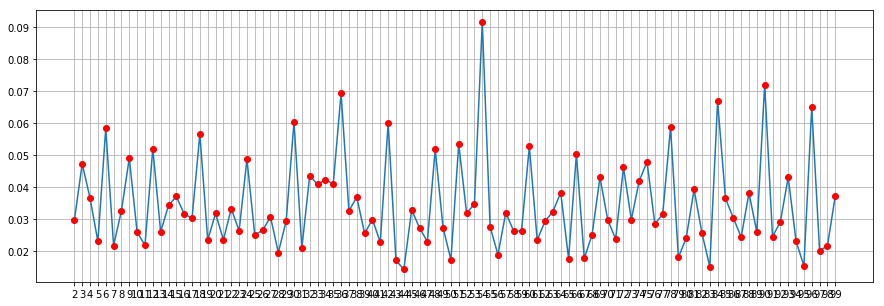

In [315]:
plt.figure(figsize=(15,5))
plt.plot(deltas, gammas)
plt.plot(deltas, gammas,'ro',color = 'red')
plt.grid(True)
plt.xticks(deltas)

plt.show()

## итог : длина ключа

In [287]:
key_length = len(key)

In [288]:
len(key)

6

## Частотный анализ

In [289]:

def get_text_chunks(text,key_len):
    texts = []
    for i in range(0,key_len):
        x = []
        start = i
        while start < len(text):
            x.append(get_char_index(text[start]))
            start += key_len
        texts.append(x)
    return texts


In [290]:
codes_encrepted = get_text_chunks(encrypted_text,key_length)

range(1, 33)
range(1, 33)
range(1, 33)
range(1, 33)
range(1, 33)
range(1, 33)


C:\Users\PC\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<function matplotlib.pyplot.show(*args, **kw)>

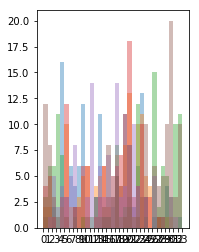

In [291]:
plt.figure(1)
for i in range(key_length):
    plt.subplot(121)
    plt.hist(codes_encrepted[i], bins=range(0, len(ALPHABET) + 1),alpha=0.4)
    plt.xticks(range(0, len(ALPHABET) + 1))
    print(range(1, len(ALPHABET)))
plt.show

In [292]:
ALPHABET_FREQ = {
    "А": 0.07821,
    "Б": 0.01732,
    "В": 0.04491,
    "Г": 0.01698,
    "Д": 0.03103,
    "Е": 0.08567,
    "Ё": 0.0007,
    "Ж": 0.01082,
    "З": 0.01647,
    "И": 0.06777,
    "Й": 0.01041,
    "К": 0.03215,
    "Л": 0.04813,
    "М": 0.03139,
    "Н": 0.0685,
    "О": 0.11394,
    "П": 0.02754,
    "Р": 0.04234,
    "С": 0.05382,
    "Т": 0.06443,
    "У": 0.02882,
    "Ф": 0.00132,
    "Х": 0.00833,
    "Ц": 0.00333,
    "Ч": 0.01645,
    "Ш": 0.00775,
    "Щ": 0.00331,
    "Ъ": 0.00023,
    "Ы": 0.01854,
    "Ь": 0.02106,
    "Э": 0.0031,
    "Ю": 0.00544,
    "Я": 0.01979,
}

In [293]:
encrypted_codes_histograms = []
for codes in codes_encrepted:
    histogram,bins = np.histogram(codes, bins=range(0, len(ALPHABET) + 1), density=True)
    encrypted_codes_histograms.append(histogram)

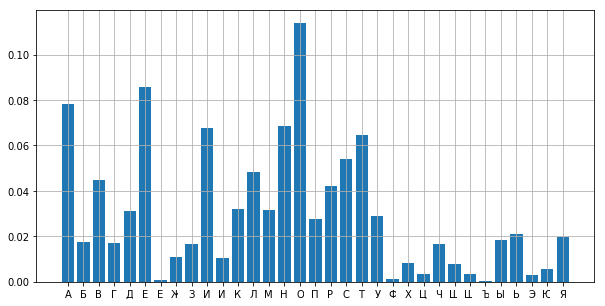

In [294]:
def plot_bar(x,y):
    plt.figure(figsize=(10,5))
    plt.bar(x,height = y )
    plt.xticks(x)
    plt.grid(True)
    plt.show()
    
plot_bar(list(ALPHABET_FREQ.keys()),list(ALPHABET_FREQ.values()))

In [295]:
def shift(l, n):
    return l[n:] + l[:n]

def corr(x,y):
    corrcoefs = []
    for delta in range(0,33):
        corrcoef = np.corrcoef(x,shift(y,delta))[0][1]
        corrcoefs.append(corrcoef)
    
    plot_bar(range(0, len(ALPHABET)),corrcoefs)
    return corrcoefs

alphabet_distr = list(ALPHABET_FREQ.values())



    

## корреляция распределения кусков и русского алфавита 
- точки максимума - есть  смещение зашифрованного алфавита 
- для нахождения кода буквы :
    - code = max(corr) - 33

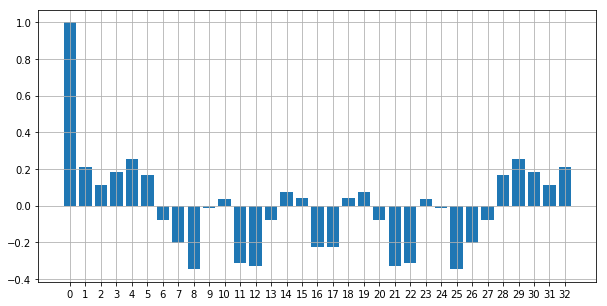

In [296]:
_ = corr(alphabet_distr,alphabet_distr)

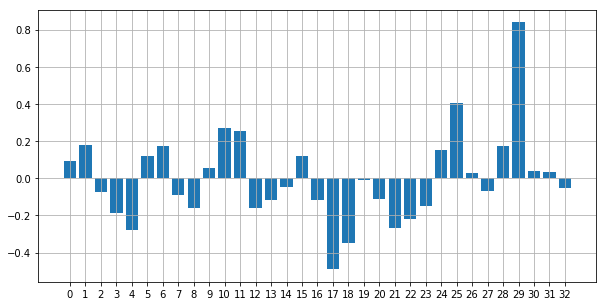

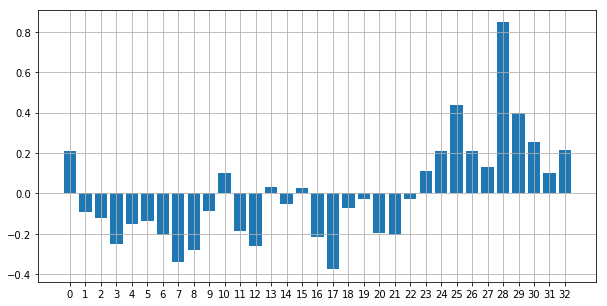

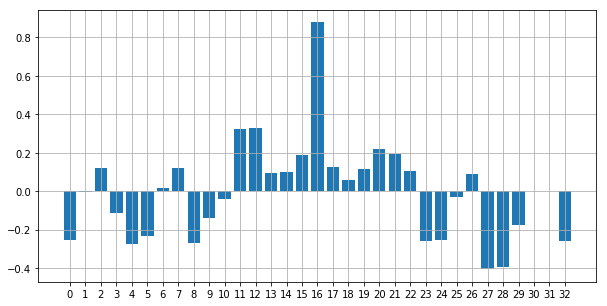

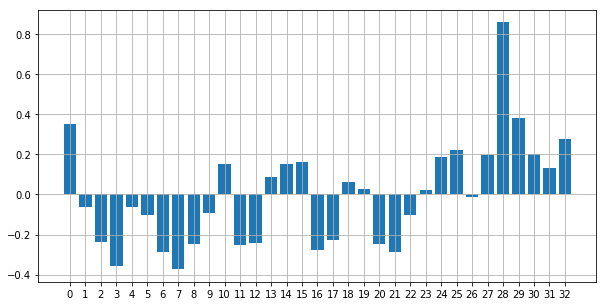

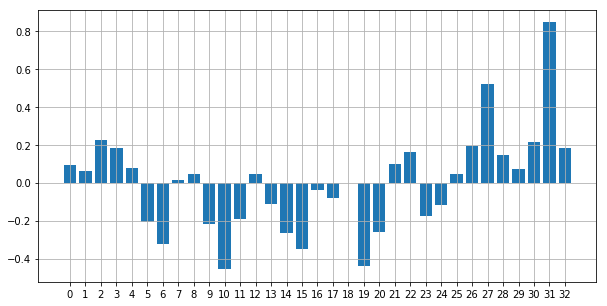

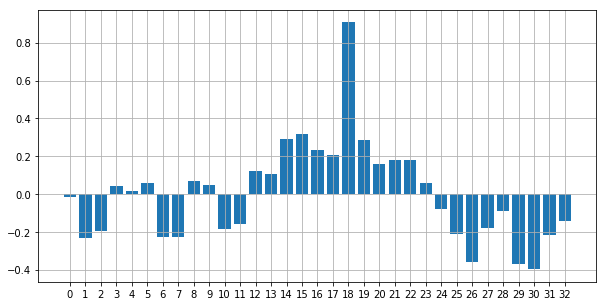

In [297]:
key_code = []
for code in encrypted_codes_histograms:
    corr_coefs = corr(code,alphabet_distr)
    max_corr = max(corr_coefs)
    index_max_corr = corr_coefs.index(max_corr)
    code_alpha = 33 - index_max_corr
    key_code.append( code_alpha if code_alpha < 33 else 0 )
    

## проверка правильности ключа

In [298]:
result_key = ''
for index in key_code:
    result_key += ALPHABET[index]

print(result_key,key)
print(result_key == key)

count = 0
for a,b in zip(result_key, key):
    if a==b:
        count += 1
        
print(count)

ДЕРЕВО ДЕРЕВО
True
6


In [307]:
code_encr = []

for j in range(len(codes_encrepted[0])):
    for i in range(key_length):
        if j >= len(codes_encrepted[i]):
            continue
        code_encr.append(codes_encrepted[i][j])
    
    

code_decr = decrypt(code_encr,key_code,is_int = True)

    

## проверка расшифровки

In [308]:
decrypt(encrypted_text,key)

'ИСТОКИСОВРЕМЕННОГОТАКСКАЗАТЬДИДЖЕЙСКОГООТНОШЕНИЯКМУЗЫКЕСЛЕДУЕТИСКАТЬНАЯМАЙКЕТАМУЖЕВСЕРЕДИНЕХГОДОВДЕЙСТВОВАЛОБОЛЕЕСАУНДСИСТЕМОНИСОСТОЯЛИИЗКОЛОНОКУСИЛИТЕЛЯПРОИГРЫВАТЕЛЯГРАМПЛАСТИНОКИГРУЗОВИКАНАКОТОРОМВСЕЭТОДОБРОРАЗЪЕЗЖАЛОПОДОРОГАМНОСАУНДСИСТЕМАЭТОРАЗУМЕЕТСЯНЕСТОЛЬКОГОРААППАРАТУРЫСКОЛЬКОКУСТАРНОЕПРЕДПРИЯТИЕПООРГАНИЗАЦИИДИСКОТЕКНАСВЕЖЕМВОЗДУХЕСАУНДСИСТЕМЫЗАВОДИЛИРИТМНБЛЮЗИЗГОТОВЛЕННЫЙВЮЖНЫХШТАТАХСШАПОЧЕМУСОБСТВЕННОИМЕННОЕГОАПОТОМУЧТОПРИЧИНОЙВОЗНИКНОВЕНИЯИРАСПРОСТРАНЕНИЯСАУНДСИСТЕМБЫЛОТОЧТОДАЛЕКОНЕВСЕЖИТЕЛИЯМАЙКИОБЛАДАЛИПОРТАТИВНЫМИРАДИОПРИЕМНИКАМИОСОБЕННЫМШИКОМСЧИТАЛОСЬСЛУШАТЬТРАНЗИСТОРНАУЛИЦЕАИЗЯМАЙСКИХРАДИОПРИЕМНИКОВНЕСЛИСЬРАЗУМЕЕТСЯПРОГРАММЫЮЖНЫХРАДИОСТАНЦИЙСШАУСТРОИТЬСАУНДСИСТЕМУЧТОБЫОРОШАТЬМОДНОЙМУЗЫКОЙВСЮУЛИЦУЭТОДОВОЛЬНОЛОГИЧНЫЙШАГ'

In [309]:
code_decr== decrypt(encrypted_text,key)

True

In [310]:
code_decr

'ИСТОКИСОВРЕМЕННОГОТАКСКАЗАТЬДИДЖЕЙСКОГООТНОШЕНИЯКМУЗЫКЕСЛЕДУЕТИСКАТЬНАЯМАЙКЕТАМУЖЕВСЕРЕДИНЕХГОДОВДЕЙСТВОВАЛОБОЛЕЕСАУНДСИСТЕМОНИСОСТОЯЛИИЗКОЛОНОКУСИЛИТЕЛЯПРОИГРЫВАТЕЛЯГРАМПЛАСТИНОКИГРУЗОВИКАНАКОТОРОМВСЕЭТОДОБРОРАЗЪЕЗЖАЛОПОДОРОГАМНОСАУНДСИСТЕМАЭТОРАЗУМЕЕТСЯНЕСТОЛЬКОГОРААППАРАТУРЫСКОЛЬКОКУСТАРНОЕПРЕДПРИЯТИЕПООРГАНИЗАЦИИДИСКОТЕКНАСВЕЖЕМВОЗДУХЕСАУНДСИСТЕМЫЗАВОДИЛИРИТМНБЛЮЗИЗГОТОВЛЕННЫЙВЮЖНЫХШТАТАХСШАПОЧЕМУСОБСТВЕННОИМЕННОЕГОАПОТОМУЧТОПРИЧИНОЙВОЗНИКНОВЕНИЯИРАСПРОСТРАНЕНИЯСАУНДСИСТЕМБЫЛОТОЧТОДАЛЕКОНЕВСЕЖИТЕЛИЯМАЙКИОБЛАДАЛИПОРТАТИВНЫМИРАДИОПРИЕМНИКАМИОСОБЕННЫМШИКОМСЧИТАЛОСЬСЛУШАТЬТРАНЗИСТОРНАУЛИЦЕАИЗЯМАЙСКИХРАДИОПРИЕМНИКОВНЕСЛИСЬРАЗУМЕЕТСЯПРОГРАММЫЮЖНЫХРАДИОСТАНЦИЙСШАУСТРОИТЬСАУНДСИСТЕМУЧТОБЫОРОШАТЬМОДНОЙМУЗЫКОЙВСЮУЛИЦУЭТОДОВОЛЬНОЛОГИЧНЫЙШАГ'